# Data Analysis: Dynamics of Software Development in South Asia

### Project Overview
The software development industries in Bangladesh, Sri Lanka, and India have shown dynamic growth over the past decade. This analysis aims to provide a comprehensive, data-driven understanding of the trends, challenges, and opportunities within the software development sectors of these countries. Using data from various sources, including the GitHub Innovation Graph, the analysis will explore key metrics related to software activity, collaboration, and industry growth.

The report is structured as follows:
- **Data Collection**: Details on the datasets used for the analysis, including their sources and relevance to the software industry in each country.
- **Data Analysis**: An exploration of the key trends identified from the data, highlighting differences and similarities between the three countries.
- **Conclusions**: Insights drawn from the data analysis, with potential implications for the future of software development in the region.

### Data Collection

The data for this analysis is sourced from multiple publicly available datasets and repositories, primarily focusing on software development activity. The **GitHub Innovation Graph** is the primary source, providing structured data on developer activity aggregated by economy. Additional sources include government reports and industry publications from each country.

| ID  | Dataset                     | Description                                                                                     | License | Access                                      |
|-----|-----------------------------|-------------------------------------------------------------------------------------------------|---------|---------------------------------------------|
| 1   | GitHub Innovation Graph      | Data on Git pushes, developers, organizations, repositories, and other software development metrics. | Open    | [GitHub Innovation Graph](#)                |

### Units of Analysis
- **Git Pushes, Developers, Repositories, Collaborators:** For these metrics, the unit of analysis is Country-Quarter. This means that the data is analyzed based on the country and the quarter, allowing for the observation of how Git pushes, the number of active developers, the growth of repositories, and international collaborations evolve over each quarter in each country (Bangladesh, Sri Lanka, and India). This approach enables both temporal and geographic comparisons, highlighting trends within each country over time.

- **Languages:** In this case, the unit of analysis is Country-Programming Language-Quarter, meaning that the data is analyzed by country, programming language, and quarter. This allows for a detailed view of which programming languages are most popular in each country and how their usage has changed over time. It enables a comparison of the adoption of languages such as JavaScript, Python, Java, and others across countries and quarters.

### Key Metrics Analyzed
- **Git Pushes**: The number of code contributions made by developers.
- **Developers**: The total number of active developers per country.
- **Repositories**: Growth in the number of software projects hosted on GitHub.
- **Languages**: The most popular programming languages used. The top 10 languages—JavaScript, Java, Python, TypeScript, C++, PHP, Ruby, C#, and Go—were selected based on various rankings and the number of available observations (Coursera Staff, 2024; DataCamp, 2023; Rice CS, 2023). Other languages like SQL, R, Julia, and Matlab were excluded due to insufficient data, limiting their comparability.
- **Collaborators**: Cross-country collaborations and open-source contributions.

### Data Analysis

#### 1. Developer Activity
- **Sri Lanka**: Leads with over 1,500 developers per 100k inhabitants by 2024, reflecting a highly active and engaged tech community.
- **India**: Shows steady growth, with nearly 1,000 developers per 100k by 2024, highlighting its massive, growing developer base.
- **Bangladesh**: Trails behind but shows steady progress, growing from just over 200 developers per 100k to over 500 by 2024.

#### 2. Repository Growth
- **Sri Lanka** outpaces the other two countries, exceeding 4,000 repositories per 100k inhabitants by 2024.
- **India** follows closely, with over 2,500 repositories per 100k, while **Bangladesh** lags with just over 1,000 repositories per 100k by 2024.

#### 3. Git Pushes
- **Sri Lanka** also leads in Git pushes per capita, surpassing 2,500 pushes per 100k by 2024.
- **India** shows steady growth, nearing 1,000 pushes per 100k.
- **Bangladesh** has lower activity but is growing, reaching around 600 pushes per 100k by 2024.

#### 4. Organizations
- **Sri Lanka** has the highest number of organizations per capita, with over 90 per 100k by 2024.
- **India** follows with over 50 organizations per 100k, while **Bangladesh** shows slower growth, nearing 30 organizations per 100k by 2024.

#### 5. Programming Languages
- **JavaScript** dominates in all three countries, with particularly rapid growth in Sri Lanka.
- **Python** and **PHP** show steady increases across the board, with **Python** gaining significant popularity in India and Sri Lanka for data science and machine learning.

### Visual Data Insights

To better understand the dynamics of software development in these countries, the following visualizations were created:
1. **Developer Activity Over Time**: Sri Lanka shows the highest developer engagement per capita, followed by India and Bangladesh.
2. **Repository Growth by Country**: Sri Lanka leads in repository creation, while India and Bangladesh show steady growth.
3. **Git Pushes per Country**: Sri Lanka continues to dominate, with India and Bangladesh showing more moderate activity.
4. **Number of Organizations per Country**: Sri Lanka has the most organizations per capita, followed by India and Bangladesh.
5. **Programming Languages**: JavaScript leads in all three countries, with Python and PHP showing steady growth.

## Programming Language Adoption Trends in South Asia: A Comparative Study of Pushers Activity in Bangladesh, Sri Lanka, and India (2020-2024)


### Bangladesh - Number of Pushers per 100k by Programming Language

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pycountry
from countryinfo import CountryInfo as CInfo # Se conecta con la informacion de cada país
import matplotlib.pyplot as plt
import  altair  as  alt # Graficos de promedios
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/github/innovationgraph/main/data/languages.csv"
data = pd.read_csv(url, delimiter=',', keep_default_na=False)
data

,num_pushers,language,language_type,iso2_code,year,quarter
0,2066,HTML,markup,AE,2020,1
1,1627,CSS,markup,AE,2020,1
2,288,Jupyter Notebook,markup,AE,2020,1
3,108,Vue,markup,AE,2020,1
4,1734,JavaScript,programming,AE,2020,1
...,...,...,...,...,...,...
112203,223,TypeScript,programming,ZW,2024,1
112204,186,PHP,programming,ZW,2024,1
112205,179,Dockerfile,programming,ZW,2024,1
112206,136,Java,programming,ZW,2024,1


In [3]:
# Filtro de EU
data = data[data.iso2_code != "EU"]

# Filtro de XK = Kosovo
data = data[data.iso2_code != "XK"]

In [4]:
nan_rows_count = data.isna().any(axis=1).sum()
print(f"There are {nan_rows_count} rows with NaN values in the dataset.")

There are 0 rows with NaN values in the dataset.


In [5]:
# Seleccionamos los 10 lenguajes mas usados en Data Science
top_program_lang = programming_languages = [
    "Python", "Java",
    "C++", "C","JavaScript", "C#",
    "Ruby", "Go", "PHP", "TypeScript"
]

In [6]:
data2 = data[data['language'].isin(top_program_lang)]
data2 = data2.reset_index(drop=True)
data2

,num_pushers,language,language_type,iso2_code,year,quarter
0,1734,JavaScript,programming,AE,2020,1
1,816,Python,programming,AE,2020,1
2,685,Java,programming,AE,2020,1
3,377,Ruby,programming,AE,2020,1
4,354,PHP,programming,AE,2020,1
...,...,...,...,...,...,...
18692,412,Python,programming,ZW,2024,1
18693,223,TypeScript,programming,ZW,2024,1
18694,186,PHP,programming,ZW,2024,1
18695,136,Java,programming,ZW,2024,1


In [7]:
data2['year_quarter'] = data2['year'].astype(str) + '-Q' + data2['quarter'].astype(str)
data2
# Reseteamos el index
data2 = data2.reset_index(drop=True)
data2

,num_pushers,language,language_type,iso2_code,year,quarter,year_quarter
0,1734,JavaScript,programming,AE,2020,1,2020-Q1
1,816,Python,programming,AE,2020,1,2020-Q1
2,685,Java,programming,AE,2020,1,2020-Q1
3,377,Ruby,programming,AE,2020,1,2020-Q1
4,354,PHP,programming,AE,2020,1,2020-Q1
...,...,...,...,...,...,...,...
18692,412,Python,programming,ZW,2024,1,2024-Q1
18693,223,TypeScript,programming,ZW,2024,1,2024-Q1
18694,186,PHP,programming,ZW,2024,1,2024-Q1
18695,136,Java,programming,ZW,2024,1,2024-Q1


In [8]:
# Creating a unique identifier
data2['unique_id'] = data2['iso2_code'] + '-' + data2['language']

In [9]:
# Create a DataFrame of unique identifiers
iso2_code = pd.DataFrame({'iso2_code': data2['iso2_code'].unique()})

# Create a DataFrame of unique identifiers for languages 
language = pd.DataFrame({'language': data2['language'].unique()})

# Create a DataFrame of all time periods
# time_periods = pd.DataFrame({'year_quarter': range(data2['year_quarter'].min(), data2['year_quarter'].max() + 1)})
year_quarter = pd.DataFrame({'year_quarter': data2['year_quarter'].unique()})

# Create the Cartesian product of unique_ids and time_periods
balanced_panel = iso2_code.merge(language, how='cross').merge(year_quarter, how='cross')

balanced_panel["unique_id"] = balanced_panel["iso2_code"] + "-" +balanced_panel["language"]
balanced_panel

# # Merge the balanced panel with the original data
balanced_df = balanced_panel.merge(data2, on=['unique_id', 'year_quarter'], how='left')

# # Merge the DataFrames with suffixes
balanced_df = balanced_panel.merge(data2, on=['unique_id', 'year_quarter'], how='left', suffixes=('', '_y'))

# # Now, drop the columns with '_y' suffix, which are from the right DataFrame
balanced_df = balanced_df.loc[:, ~balanced_df.columns.str.endswith('_y')]
balanced_df 

,iso2_code,language,year_quarter,unique_id,num_pushers,language_type,year,quarter
0,AE,JavaScript,2020-Q1,AE-JavaScript,1734.0,programming,2020.0,1.0
1,AE,JavaScript,2020-Q2,AE-JavaScript,2299.0,programming,2020.0,2.0
2,AE,JavaScript,2020-Q3,AE-JavaScript,2366.0,programming,2020.0,3.0
3,AE,JavaScript,2020-Q4,AE-JavaScript,2468.0,programming,2020.0,4.0
4,AE,JavaScript,2021-Q1,AE-JavaScript,2544.0,programming,2021.0,1.0
...,...,...,...,...,...,...,...,...
27365,LS,Go,2023-Q1,LS-Go,NaN,NaN,NaN,NaN
27366,LS,Go,2023-Q2,LS-Go,NaN,NaN,NaN,NaN
27367,LS,Go,2023-Q3,LS-Go,NaN,NaN,NaN,NaN
27368,LS,Go,2023-Q4,LS-Go,NaN,NaN,NaN,NaN


In [10]:
# Function to convert quarter format to integer
def quarter_to_int(quarter_string):
    year, q = quarter_string.split('-')
    year = int(year)
    quarter_number = int(q[1])  # Q1, Q2, Q3, Q4 -> 1, 2, 3, 4
    base_year = 2020  # Adjust based on your balanced_df, or set dynamically
    return 4 * (year - base_year) + quarter_number

# Applying the function
balanced_df['quarter'] = balanced_df['year_quarter'].apply(quarter_to_int)
balanced_df['year'] = balanced_df['year_quarter'].str.split('-').str[0]
balanced_df.loc[balanced_df["num_pushers"].isnull(), "num_pushers"] = 0
balanced_df

,iso2_code,language,year_quarter,unique_id,num_pushers,language_type,year,quarter
0,AE,JavaScript,2020-Q1,AE-JavaScript,1734.0,programming,2020,1
1,AE,JavaScript,2020-Q2,AE-JavaScript,2299.0,programming,2020,2
2,AE,JavaScript,2020-Q3,AE-JavaScript,2366.0,programming,2020,3
3,AE,JavaScript,2020-Q4,AE-JavaScript,2468.0,programming,2020,4
4,AE,JavaScript,2021-Q1,AE-JavaScript,2544.0,programming,2021,5
...,...,...,...,...,...,...,...,...
27365,LS,Go,2023-Q1,LS-Go,0.0,NaN,2023,13
27366,LS,Go,2023-Q2,LS-Go,0.0,NaN,2023,14
27367,LS,Go,2023-Q3,LS-Go,0.0,NaN,2023,15
27368,LS,Go,2023-Q4,LS-Go,0.0,NaN,2023,16


In [11]:
# Definimos una función que convierte los nombres de países en códigos iso2
def country_to_iso2(country_name):
    try:
        # Intentamos obtener el código iso2 del país usando pycountry
        return pycountry.countries.get(name=country_name).alpha_2
    except AttributeError:
        try:
            # Manejamos casos especiales donde el nombre del país no coincide exactamente con la base de datos de pycountry
            special_cases = {
                "Czechia (Czech Republic)": "CZ",
                "Congo (Congo-Brazzaville)": "CG",
                "Holy See": "VA",
                "Timor-Leste (East Timor)": "TL",
                "Ukraine (with certain exceptions)": "UA",
                "Taiwan": "TW",
                "Bolivia": "BO",
                "Tanzania": "TZ",
                "South Korea": "KR",
                "Moldova": "MD",
                "Brunei": "BN"
            }
            return special_cases[country_name]
        except KeyError:
            return None

# Creamos una lista de países y obtenemos sus códigos iso2 usando la función country_to_iso2
gpt_countries_list = [
    "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria",
    "Azerbaijan", "Bahamas", "Bangladesh", "Barbados", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia",
    "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Cabo Verde", "Canada",
    "Chile", "Colombia", "Comoros", "Congo (Congo-Brazzaville)", "Costa Rica", "Côte d'Ivoire", "Croatia", "Cyprus",
    "Czechia", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", "Estonia", "Fiji",
    "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iraq",
    "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait",
    "Kyrgyzstan", "Latvia", "Lebanon", "Lesotho", "Liberia", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia",
    "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway",
    "Oman", "Pakistan", "Palau", "Palestine, State of", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Qatar", "Romania", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "South Africa",
    "South Korea", "Spain", "Sri Lanka", "Suriname", "Sweden", "Switzerland", "Taiwan", "Tanzania", "Thailand",
    "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Tuvalu", "Uganda", "Ukraine",
    "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Vanuatu", "Zambia"
]

gpt_countries_iso = [country_to_iso2(country) for country in gpt_countries_list]

# Agregamos una nueva columna gpt_available, con valor 1 si el código iso2 está en la lista gpt_countries_iso, y 0 en caso contrario
balanced_df["gpt_available"] = balanced_df["iso2_code"].apply(lambda row: 1 if row in gpt_countries_iso else 0)

In [12]:
countries = balanced_df.iso2_code.unique()

def create_populations_dictionary():
    country_populations = {}
    special_cases = {"MM": 54688774, "PS": 5483450, "ME": 602445, "AD":79824}
    # special_cases = {}
    for country in countries:
        try:
            country_populations.update({country: CInfo(country).info()["population"]})
        except KeyError:
            try:
                fallback_name = pycountry.countries.lookup(country).name
                country_populations.update({country: CInfo(fallback_name).info()["population"]})
            except KeyError:
                print(country)
                country_populations.update({country: special_cases[country]})

    return country_populations

country_populations = create_populations_dictionary()

ME


MM


PS


AD


In [13]:
# Create population
balanced_df["population"] = balanced_df["iso2_code"].map(country_populations)

# Create pushes_pc
balanced_df["num_pushers_pc"] = (balanced_df["num_pushers"] / balanced_df["population"])*100000

In [14]:
df_filtered_BD = balanced_df[balanced_df['iso2_code'] == 'BD']
df_filtered_BD

,iso2_code,language,year_quarter,unique_id,num_pushers,language_type,year,quarter,gpt_available,population,num_pushers_pc
1530,BD,JavaScript,2020-Q1,BD-JavaScript,7039.0,programming,2020,1,1,157486000,4.469604
1531,BD,JavaScript,2020-Q2,BD-JavaScript,8393.0,programming,2020,2,1,157486000,5.329363
1532,BD,JavaScript,2020-Q3,BD-JavaScript,11229.0,programming,2020,3,1,157486000,7.130158
1533,BD,JavaScript,2020-Q4,BD-JavaScript,11331.0,programming,2020,4,1,157486000,7.194925
1534,BD,JavaScript,2021-Q1,BD-JavaScript,14077.0,programming,2021,5,1,157486000,8.938572
...,...,...,...,...,...,...,...,...,...,...,...
1695,BD,Go,2023-Q1,BD-Go,605.0,programming,2023,13,1,157486000,0.384161
1696,BD,Go,2023-Q2,BD-Go,571.0,programming,2023,14,1,157486000,0.362572
1697,BD,Go,2023-Q3,BD-Go,590.0,programming,2023,15,1,157486000,0.374636
1698,BD,Go,2023-Q4,BD-Go,627.0,programming,2023,16,1,157486000,0.398131


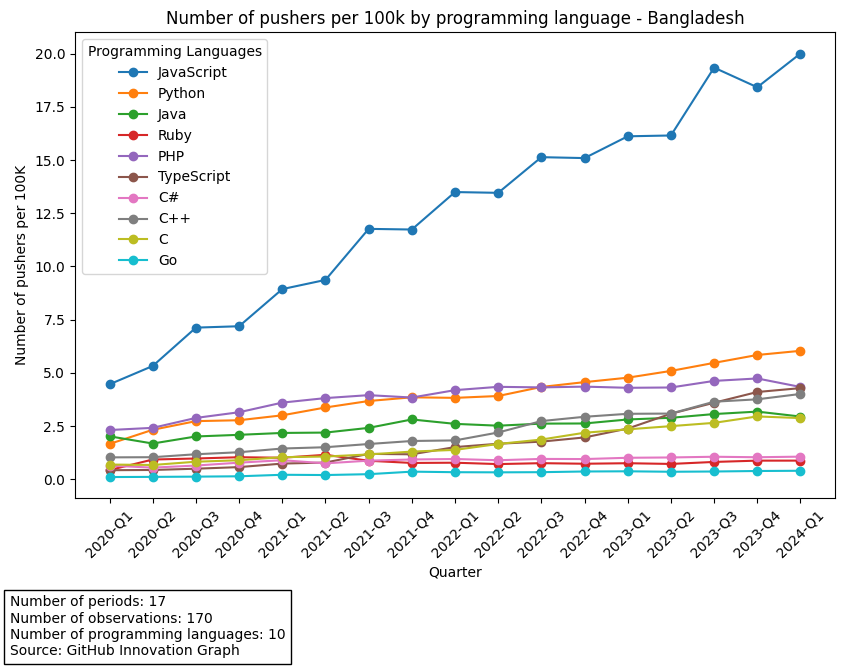

In [15]:
plt.figure(figsize=(10, 6))
languages = df_filtered_BD['language'].unique()

# Trazar cada lenguaje por separado
for lang in languages:
    filtered_data = df_filtered_BD[df_filtered_BD['language'] == lang]
    plt.plot(filtered_data['year_quarter'], filtered_data['num_pushers_pc'], marker='o', label=lang)

# Personalización del gráfico
plt.title('Number of pushers per 100k by programming language - Bangladesh')
plt.xlabel('Quarter')
plt.ylabel('Number of pushers per 100K')
plt.xticks(rotation=45)
plt.legend(title='Programming Languages')

# Crear el texto adicional para estadísticas
text_data = [
    'Number of periods: 17',
    'Number of observations: 170',
    'Number of programming languages: 10',
    'Source: GitHub Innovation Graph'
]

# Mostrar el texto en el gráfico (fuera del área principal)
plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))
# Ajustar el diseño para evitar superposición de elementos
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar el gráfico
plt.show()

#### Analysis
This graph represents the number of pushers per 100,000 inhabitants by programming language in Bangladesh, from Q1 2020 to Q1 2024. Key insights from the graph include:

- **JavaScript** shows a steep increase in the number of pushers over time, rising from around 5 per 100k to approximately 17 per 100k, indicating its growing popularity in Bangladesh's developer community.
- **Python** and **PHP** also display moderate growth, with Python being the most steadily increasing language in terms of usage among developers.
- Languages like **C**, **C#**, and **C++** remain relatively low in terms of usage, showing minimal fluctuations during the period.

This data indicates a strong preference for web development technologies, with JavaScript, PHP, and Python leading the way, while systems programming languages like C and C++ are less popular in Bangladesh.

#### Key Observations:
- **JavaScript** dominance can be attributed to its widespread use in web and mobile application development.
- **Python**’s steady growth reflects its use in data science and machine learning projects, which are becoming more popular.
- Other languages such as **Ruby**, **Go**, and **TypeScript** show little to no significant change, suggesting they have a niche but stable developer base.

### Sri Lanka - Number of Pushers per 100k by Programming Language

In [16]:
df_filtered_LK = balanced_df[balanced_df['iso2_code'] == 'LK']
df_filtered_LK

,iso2_code,language,year_quarter,unique_id,num_pushers,language_type,year,quarter,gpt_available,population,num_pushers_pc
11560,LK,JavaScript,2020-Q1,LK-JavaScript,3764.0,programming,2020,1,1,20277597,18.562357
11561,LK,JavaScript,2020-Q2,LK-JavaScript,5041.0,programming,2020,2,1,20277597,24.859948
11562,LK,JavaScript,2020-Q3,LK-JavaScript,4722.0,programming,2020,3,1,20277597,23.286783
11563,LK,JavaScript,2020-Q4,LK-JavaScript,5865.0,programming,2020,4,1,20277597,28.923546
11564,LK,JavaScript,2021-Q1,LK-JavaScript,4977.0,programming,2021,5,1,20277597,24.544328
...,...,...,...,...,...,...,...,...,...,...,...
11725,LK,Go,2023-Q1,LK-Go,270.0,programming,2023,13,1,20277597,1.331519
11726,LK,Go,2023-Q2,LK-Go,332.0,programming,2023,14,1,20277597,1.637275
11727,LK,Go,2023-Q3,LK-Go,298.0,programming,2023,15,1,20277597,1.469602
11728,LK,Go,2023-Q4,LK-Go,506.0,programming,2023,16,1,20277597,2.495365


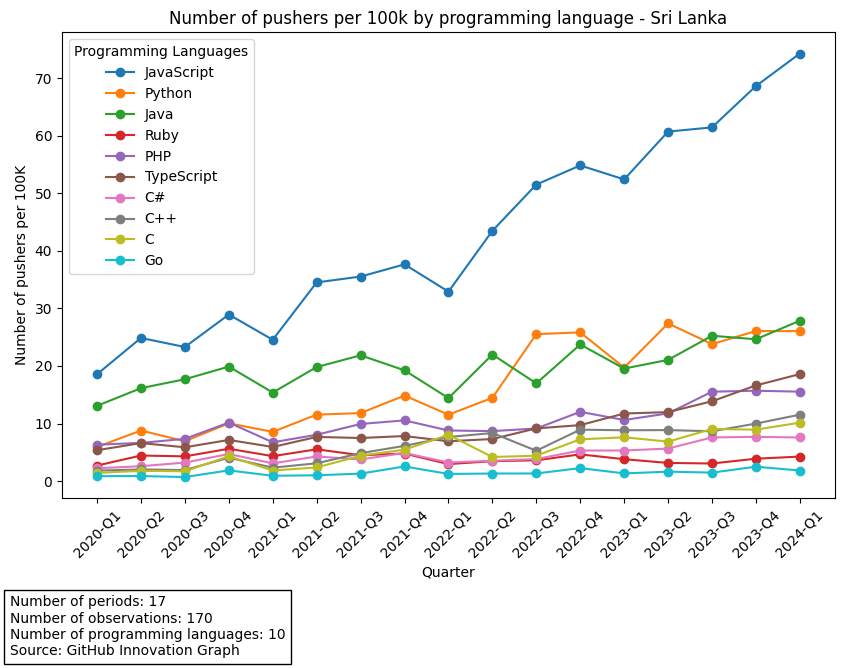

In [17]:
plt.figure(figsize=(10, 6))
languages = df_filtered_LK['language'].unique() # type: ignore

for lang in languages:
    filtered_data_1 = df_filtered_LK[df_filtered_LK['language'] == lang] # type: ignore
    plt.plot(filtered_data_1['year_quarter'], filtered_data_1['num_pushers_pc'], marker='o', label=lang)

plt.title('Number of pushers per 100k by programming language - Sri Lanka')
plt.xlabel('Quarter')
plt.ylabel('Number of pushers per 100K')
plt.xticks(rotation=45)
plt.legend(title='Programming Languages')

text_data = [
    'Number of periods: 17',
    'Number of observations: 170',
    'Number of programming languages: 10',
    'Source: GitHub Innovation Graph'
]

plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

#### Analysis
This graph displays the number of pushers per 100,000 inhabitants by programming language in Sri Lanka, from Q1 2020 to Q1 2024. The key observations from this data include:

- **JavaScript** shows the most significant increase over time, starting around 20 pushers per 100k and reaching nearly 70 pushers by Q1 2024. This indicates a robust and growing preference for JavaScript in Sri Lanka's software development ecosystem.
- **PHP** and **Python** are also popular languages, with PHP showing more fluctuations, but both languages have maintained steady growth over the years.
- Similar to the Bangladesh trend, **C**, **C#**, and **C++** remain less popular, with minimal changes in the number of pushers.
- **Go** and **Ruby** have very little presence, maintaining a low and stable number of pushers per 100k, which suggests limited adoption in Sri Lanka.

#### Key Observations:
- The steep rise in **JavaScript** reflects Sri Lanka’s increased focus on web and mobile development, likely driven by a growing digital economy.
- **PHP**'s fluctuations may point to its widespread but varying use in specific web development projects.
- **Python**'s steady increase shows its ongoing use in data science and automation tasks, aligning with global trends in software development.
- **C**, **C#**, and **C++** continue to be niche languages in Sri Lanka, focused perhaps on specific system-level applications or educational contexts.

#### Comparative Analysis with Bangladesh:
- Sri Lanka shows a more dramatic rise in **JavaScript** compared to Bangladesh, with a larger base of pushers per 100k.
- **Python** and **PHP** have similar levels of growth in both countries, although Sri Lanka shows more fluctuations in **PHP** usage.

### India - Number of Pushers per 100k by Programming Language

In [18]:
df_filtered_IN = balanced_df[balanced_df['iso2_code'] == 'IN']
df_filtered_IN

,iso2_code,language,year_quarter,unique_id,num_pushers,language_type,year,quarter,gpt_available,population,num_pushers_pc
8840,IN,JavaScript,2020-Q1,IN-JavaScript,110247.0,programming,2020,1,1,1263930000,8.722556
8841,IN,JavaScript,2020-Q2,IN-JavaScript,157459.0,programming,2020,2,1,1263930000,12.457889
8842,IN,JavaScript,2020-Q3,IN-JavaScript,184385.0,programming,2020,3,1,1263930000,14.588229
8843,IN,JavaScript,2020-Q4,IN-JavaScript,190204.0,programming,2020,4,1,1263930000,15.048618
8844,IN,JavaScript,2021-Q1,IN-JavaScript,185333.0,programming,2021,5,1,1263930000,14.663233
...,...,...,...,...,...,...,...,...,...,...,...
9005,IN,Go,2023-Q1,IN-Go,12655.0,programming,2023,13,1,1263930000,1.001242
9006,IN,Go,2023-Q2,IN-Go,13082.0,programming,2023,14,1,1263930000,1.035026
9007,IN,Go,2023-Q3,IN-Go,13742.0,programming,2023,15,1,1263930000,1.087244
9008,IN,Go,2023-Q4,IN-Go,19206.0,programming,2023,16,1,1263930000,1.519546


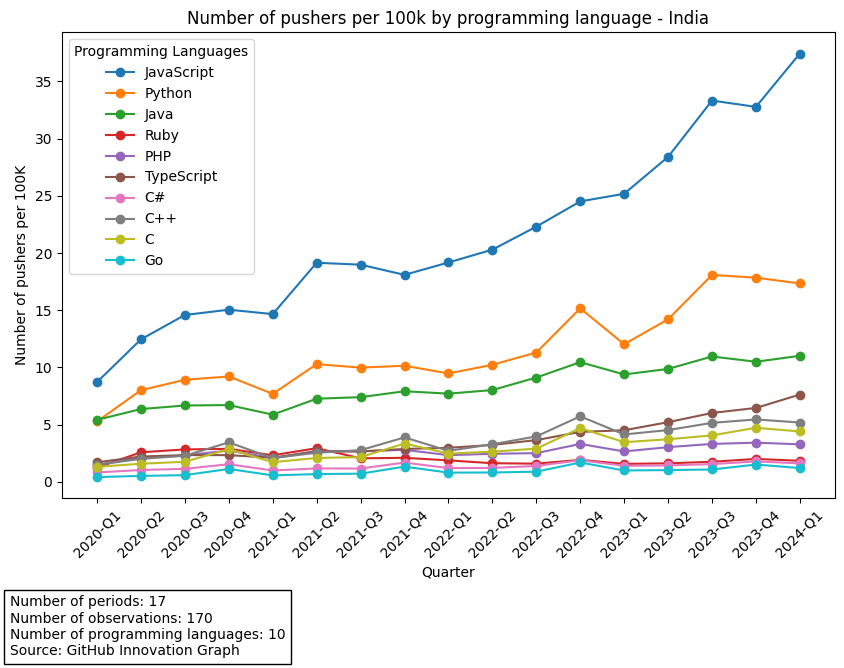

In [19]:
plt.figure(figsize=(10, 6))
languages = df_filtered_IN['language'].unique() # type: ignore

for lang in languages:
    filtered_data_2 = df_filtered_IN[df_filtered_IN['language'] == lang] # type: ignore
    plt.plot(filtered_data_2['year_quarter'], filtered_data_2['num_pushers_pc'], marker='o', label=lang)

plt.title('Number of pushers per 100k by programming language - India')
plt.xlabel('Quarter')
plt.ylabel('Number of pushers per 100K')
plt.xticks(rotation=45)
plt.legend(title='Programming Languages')

text_data = [
    'Number of periods: 17',
    'Number of observations: 170',
    'Number of programming languages: 10',
    'Source: GitHub Innovation Graph'
]

plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

#### Analysis
This graph presents the number of pushers per 100,000 inhabitants by programming language in India, from Q1 2020 to Q1 2024. The following insights can be drawn from the data:

- **JavaScript** shows the highest growth rate, increasing from around 15 per 100k in early 2020 to over 35 per 100k by Q1 2024, underscoring its widespread adoption in India’s growing tech industry.
- **Python** and **PHP** also show considerable growth, with Python experiencing a steady rise and PHP showing a moderate increase, indicating the increasing popularity of Python for data science and automation.
- **Java** remains consistently strong, holding the second spot in popularity, reflecting its long-standing use in enterprise solutions and mobile app development, particularly in India’s large-scale IT projects.
- **C**, **C#**, and **C++** continue to have a stable but smaller developer base compared to web development languages.

#### Key Observations:
- **JavaScript** dominates the developer landscape, which is indicative of India’s focus on web development, startups, and mobile application ecosystems.
- **Python**'s steady increase reflects the global trend of using the language for data-driven tasks and machine learning, areas where India is becoming a key global player.
- **PHP** still holds importance for web-based projects, but it does not show as significant growth as JavaScript or Python.
- The relatively flat growth in **C**, **C#**, and **C++** indicates that these languages are likely being used for specialized or legacy systems rather than driving innovation in the modern tech stack.

#### Comparative Analysis with Bangladesh and Sri Lanka:
- **India** shows significantly higher activity in all languages, particularly **JavaScript** and **Java**, compared to Bangladesh and Sri Lanka, highlighting its role as a major IT hub.
- While **Python** is also popular in Bangladesh and Sri Lanka, its growth in India is more pronounced, reflecting its broader use in advanced tech sectors such as AI and big data.

## Technological Growth and Innovation Across South Asia: A Comparative Analysis of India, Bangladesh, and Sri Lanka (2020-2024)

### Number of Pushes per 100k by Country (2020Q1 - 2024Q1)

In [20]:
url = "https://raw.githubusercontent.com/github/innovationgraph/main/data/git_pushes.csv"
pushes = pd.read_csv(url, delimiter=',', keep_default_na=False)
pushes

,git_pushes,iso2_code,year,quarter
0,21377653,US,2020,1
1,17175696,EU,2020,1
2,5567938,CN,2020,1
3,4422587,IN,2020,1
4,3980488,GB,2020,1
...,...,...,...,...
2886,1701,BS,2024,1
2887,1640,KY,2024,1
2888,1383,PG,2024,1
2889,953,TD,2024,1


In [21]:
pushes = pushes[pushes.iso2_code != "EU"]

In [22]:
git_update = pushes[pushes['iso2_code'].isin(['BD', 'LK', 'IN'])]
git_update = git_update.reset_index(drop=True)
git_update.head()

,git_pushes,iso2_code,year,quarter
0,4422587,IN,2020,1
1,295222,BD,2020,1
2,144885,LK,2020,1
3,7346825,IN,2020,2
4,390126,BD,2020,2


In [23]:
# Create population
git_update["population"] = git_update["iso2_code"].map(country_populations)

# Create organizations_pc
git_update["git_pushes_pc"] = (git_update["git_pushes"] / git_update["population"])*100000

#create year-quarter
git_update['year_quarter'] = git_update['year'].astype(str) + '-Q' + git_update['quarter'].astype(str)

# Mapeo de códigos ISO a nombres de países
country_map = {
    'BD': 'Bangladesh',
    'IN': 'India',
    'LK': 'Sri Lanka'
}

# Crear una nueva columna con los nombres de los países
git_update['country'] = git_update['iso2_code'].map(country_map)


git_update.head()

,git_pushes,iso2_code,year,quarter,population,git_pushes_pc,year_quarter,country
0,4422587,IN,2020,1,1263930000,349.907590,2020-Q1,India
1,295222,BD,2020,1,157486000,187.459203,2020-Q1,Bangladesh
2,144885,LK,2020,1,20277597,714.507740,2020-Q1,Sri Lanka
3,7346825,IN,2020,2,1263930000,581.268346,2020-Q2,India
4,390126,BD,2020,2,157486000,247.721067,2020-Q2,Bangladesh


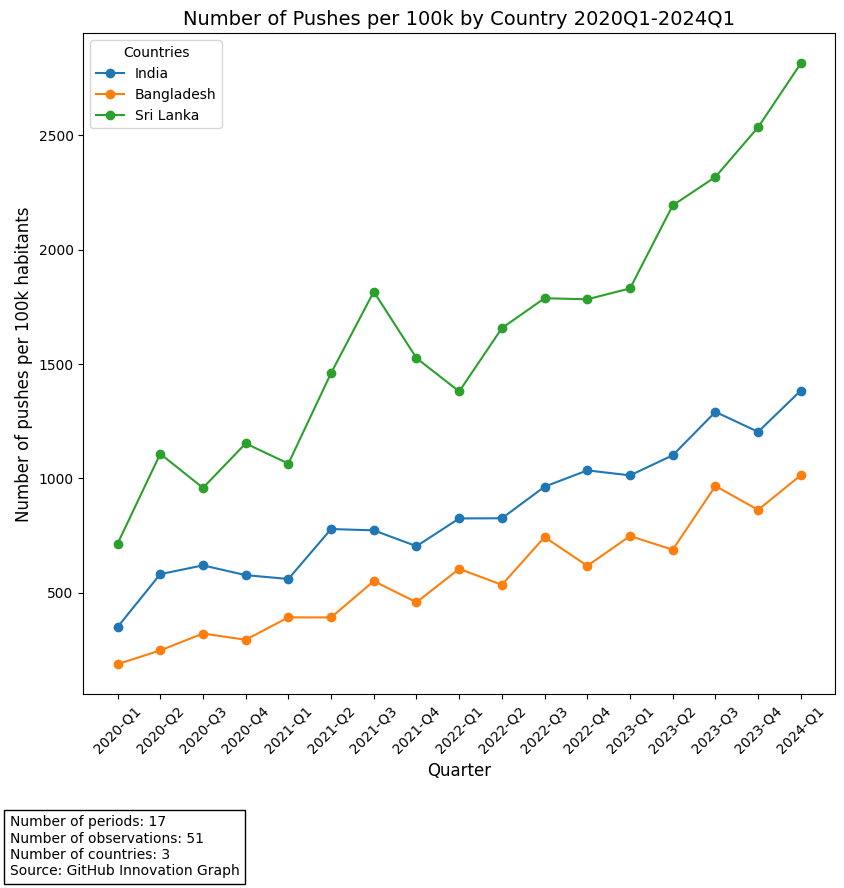

In [24]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 8))

# Obtener los países únicos usando la columna 'iso2_code'
countries = git_update['country'].unique()

# Trazar cada país por separado
for country in countries:
    filtered_data_4 = git_update[git_update['country'] == country]
    plt.plot(filtered_data_4['year_quarter'], filtered_data_4['git_pushes_pc'], marker='o', label=country)

# Personalización del gráfico
plt.title('Number of Pushes per 100k by Country 2020Q1-2024Q1', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of pushes per 100k habitants', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Countries', loc='upper left')
# Crear el texto adicional para estadísticas
text_data = [
    'Number of periods: {}'.format(git_update['year_quarter'].nunique()),
    'Number of observations: {}'.format(len(git_update)),
    'Number of countries: {}'.format(git_update['iso2_code'].nunique()),
    'Source: GitHub Innovation Graph'
]

# Mostrar el texto en el gráfico (fuera del área principal)
plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))
# Ajustar el diseño para evitar superposición de elementos
plt.tight_layout(rect=[0, 0, 0.85, 1])



# Mostrar el gráfico
plt.show()

#### Analysis
This graph presents the number of Git pushes per 100,000 inhabitants by country (India, Bangladesh, and Sri Lanka) from Q1 2020 to Q1 2024. Key observations include:

- **Sri Lanka** exhibits the highest activity in terms of Git pushes per capita, with a significant increase, reaching over 2,500 pushes per 100k inhabitants by Q1 2024. This shows a highly active developer community that consistently contributes to repositories.
- **India** maintains steady growth, with Git pushes increasing from around 500 per 100k in 2020 to over 1,000 per 100k by 2024. This reflects India’s growing base of developers and continuous contributions to code repositories.
- **Bangladesh**, while starting from a lower base, shows a gradual increase in pushes, reaching around 600 per 100k by Q1 2024. Although the growth is slower compared to the other two countries, it indicates a steady expansion in developer activity.

#### Key Observations:
- **Sri Lanka** clearly leads in terms of Git pushes per capita, which indicates that its developers are highly engaged in collaborative and open-source projects.
- **India** shows a consistent upward trend, which aligns with the country’s broader role in the global software development industry, reflecting growing engagement from its developer population.
- **Bangladesh** has a slower growth rate but shows steady progress, indicating that its tech ecosystem is gradually becoming more active.

#### Comparative Insights:
- **Sri Lanka**’s rapid rise in Git pushes per capita suggests a strong emphasis on open-source development and collaborative projects, making it a regional leader in software contributions.
- **India**’s growth, though moderate, reflects the massive scale of its developer base and consistent contributions to both local and global projects.
- **Bangladesh** shows slower growth but represents an emerging tech scene, where increasing contributions suggest a positive trajectory for the country’s software development activities.

### Number of Repositories per 100k by Country (2020Q1 - 2024Q1)

In [25]:
url = "https://raw.githubusercontent.com/github/innovationgraph/main/data/repositories.csv"
repos = pd.read_csv(url, delimiter=',', keep_default_na=False)
repos

,repositories,iso2_code,year,quarter
0,30669781,US,2020,1
1,20179087,CN,2020,1
2,17912888,EU,2020,1
3,9254535,IN,2020,1
4,4171705,GB,2020,1
...,...,...,...,...
3786,183,SH,2024,1
3787,180,TO,2024,1
3788,136,KI,2024,1
3789,129,PM,2024,1


In [26]:
repos_update = repos[repos['iso2_code'].isin(['BD', 'LK', 'IN'])]
repos_update = repos_update.reset_index(drop=True)
repos_update.head()

,repositories,iso2_code,year,quarter
0,9254535,IN,2020,1
1,588881,BD,2020,1
2,257723,LK,2020,1
3,10503365,IN,2020,2
4,656174,BD,2020,2


In [27]:
# Create population
repos_update["population"] = repos_update["iso2_code"].map(country_populations)

# Create pushes_pc
repos_update["repositories_pc"] = (repos_update["repositories"] / repos_update["population"])*100000

#create year-quarter
repos_update['year_quarter'] = repos_update['year'].astype(str) + '-Q' + repos_update['quarter'].astype(str)


# Mapeo de códigos ISO a nombres de países
country_map = {
    'BD': 'Bangladesh',
    'IN': 'India',
    'LK': 'Sri Lanka'
}

# Crear una nueva columna con los nombres de los países
repos_update['country'] = repos_update['iso2_code'].map(country_map)

repos_update.head()

,repositories,iso2_code,year,quarter,population,repositories_pc,year_quarter,country
0,9254535,IN,2020,1,1263930000,732.203128,2020-Q1,India
1,588881,BD,2020,1,157486000,373.925936,2020-Q1,Bangladesh
2,257723,LK,2020,1,20277597,1270.974071,2020-Q1,Sri Lanka
3,10503365,IN,2020,2,1263930000,831.008442,2020-Q2,India
4,656174,BD,2020,2,157486000,416.655449,2020-Q2,Bangladesh


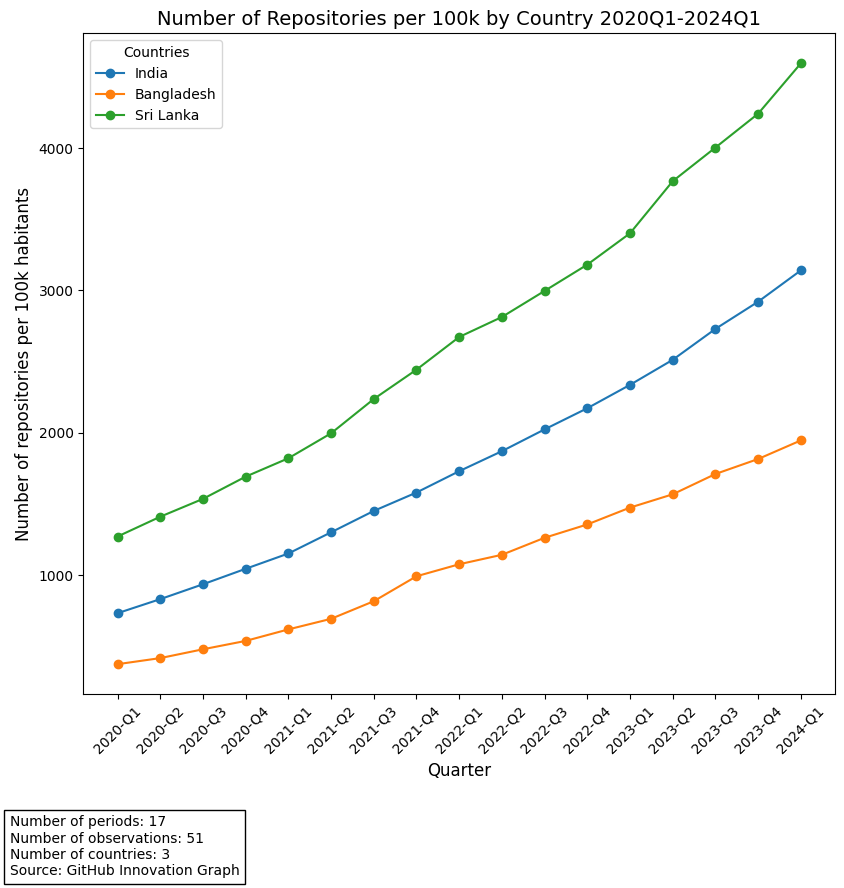

In [28]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 8))

# Obtener los países únicos usando la columna 'iso2_code'
countries = repos_update['country'].unique()

# Trazar cada país por separado
for country in countries:
    filtered_data = repos_update[repos_update['country'] == country]
    plt.plot(filtered_data['year_quarter'], filtered_data['repositories_pc'], marker='o', label=country)

# Personalización del gráfico
plt.title('Number of Repositories per 100k by Country 2020Q1-2024Q1', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of repositories per 100k habitants', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Countries', loc='upper left')
# Crear el texto adicional para estadísticas
text_data = [
    'Number of periods: {}'.format(repos_update['year_quarter'].nunique()),
    'Number of observations: {}'.format(len(repos_update)),
    'Number of countries: {}'.format(repos_update['iso2_code'].nunique()),
    'Source: GitHub Innovation Graph'
]

# Mostrar el texto en el gráfico (fuera del área principal)
plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))
# Ajustar el diseño para evitar superposición de elementos
plt.tight_layout(rect=[0, 0, 0.85, 1])



# Mostrar el gráfico
plt.show()

#### Analysis
This graph shows the number of repositories per 100,000 inhabitants by country (India, Bangladesh, and Sri Lanka) from Q1 2020 to Q1 2024. The following key insights can be drawn from the data:

- **Sri Lanka** leads in the number of repositories per 100k inhabitants, consistently staying ahead of both India and Bangladesh. By Q1 2024, Sri Lanka has exceeded 4,000 repositories per 100k inhabitants.
- **India** shows steady growth, following closely behind Sri Lanka. India's repository creation per capita has surpassed 2,500 by Q1 2024, indicating the country's solid and growing developer base.
- **Bangladesh**, while demonstrating growth, lags behind both Sri Lanka and India. By Q1 2024, Bangladesh reaches just over 1,000 repositories per 100k inhabitants.

#### Key Observations:
- **Sri Lanka**'s higher number of repositories per 100k inhabitants suggests a highly active and engaged developer community relative to its population size. This could be due to a thriving tech startup ecosystem and active government support for digital initiatives.
- **India** shows substantial growth in repository creation, reflecting the country's growing importance in the global software industry, though its per capita repository count remains lower than that of Sri Lanka.
- **Bangladesh**'s lower repository creation rate indicates that while the tech industry is growing, it is still developing compared to its regional counterparts.

#### Comparative Insights:
- The data highlights **Sri Lanka** as an outlier in terms of repository creation per capita. Despite being smaller in population, Sri Lanka outpaces India and Bangladesh significantly.
- **India**, with its much larger population, has a lower number of repositories per capita but still shows impressive growth, reflecting the scale of its developer ecosystem.
- **Bangladesh**, although trailing in repository creation, is showing consistent progress, suggesting that the country's software development sector is steadily maturing.

### Number of Developers per 100k by Country (2020Q1 - 2024Q1)

In [29]:
url = "https://raw.githubusercontent.com/github/innovationgraph/main/data/developers.csv"
dev = pd.read_csv(url, delimiter=',', keep_default_na=False)
dev.head()

,developers,iso2_code,year,quarter
0,9763122,US,2020,1
1,6983489,EU,2020,1
2,5885036,CN,2020,1
3,4194257,IN,2020,1
4,1635516,GB,2020,1


In [30]:
dev = dev[dev.iso2_code != "EU"]

In [31]:
dev_update = dev[dev['iso2_code'].isin(['BD', 'LK', 'IN'])]
dev_update = dev_update.reset_index(drop=True)
dev_update.head()

,developers,iso2_code,year,quarter
0,4194257,IN,2020,1
1,215789,BD,2020,1
2,84292,LK,2020,1
3,4684375,IN,2020,2
4,246934,BD,2020,2


In [32]:
# Create population
dev_update["population"] = dev_update["iso2_code"].map(country_populations)

# Create pushes_pc
dev_update["developers_pc"] = (dev_update["developers"] / dev_update["population"])*100000

#create year-quarter
dev_update['year_quarter'] = dev_update['year'].astype(str) + '-Q' + dev_update['quarter'].astype(str)

# Mapeo de códigos ISO a nombres de países
country_map = {
    'BD': 'Bangladesh',
    'IN': 'India',
    'LK': 'Sri Lanka'
}

# Crear una nueva columna con los nombres de los países
dev_update['country'] = dev_update['iso2_code'].map(country_map)

dev_update.head()

,developers,iso2_code,year,quarter,population,developers_pc,year_quarter,country
0,4194257,IN,2020,1,1263930000,331.842507,2020-Q1,India
1,215789,BD,2020,1,157486000,137.021069,2020-Q1,Bangladesh
2,84292,LK,2020,1,20277597,415.690281,2020-Q1,Sri Lanka
3,4684375,IN,2020,2,1263930000,370.619813,2020-Q2,India
4,246934,BD,2020,2,157486000,156.797430,2020-Q2,Bangladesh


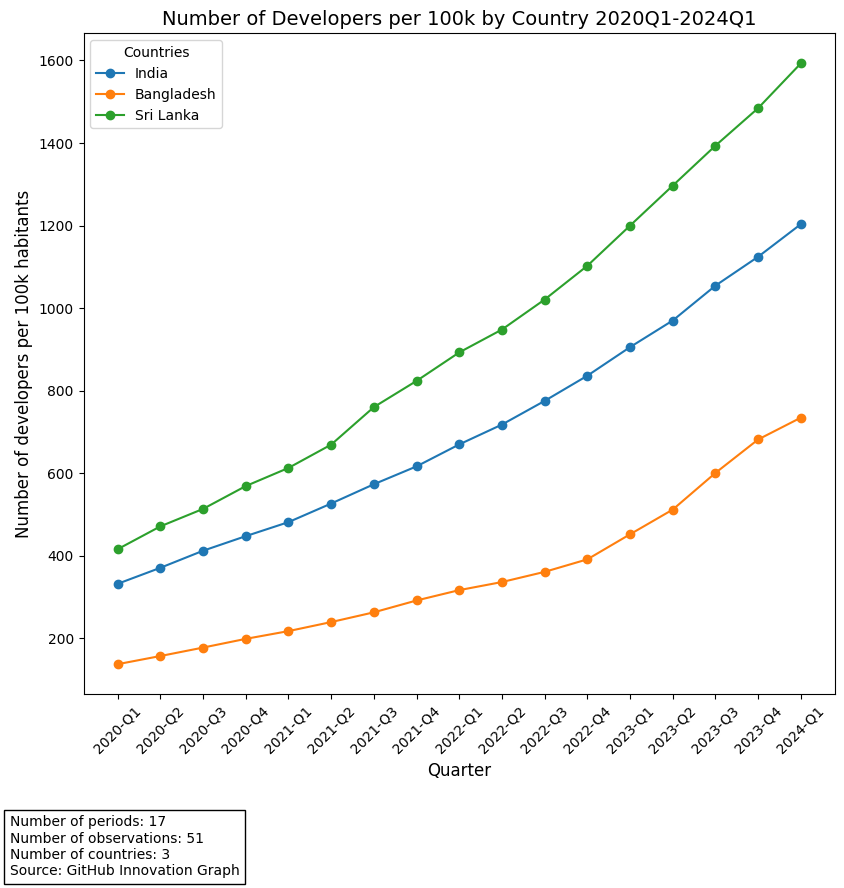

In [33]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 8))

# Obtener los países únicos usando la columna 'iso2_code'
countries = dev_update['country'].unique()

# Trazar cada país por separado
for country in countries:
    filtered_data = dev_update[dev_update['country'] == country]
    plt.plot(filtered_data['year_quarter'], filtered_data['developers_pc'], marker='o', label=country)

# Personalización del gráfico
plt.title('Number of Developers per 100k by Country 2020Q1-2024Q1', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of developers per 100k habitants', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Countries', loc='upper left')
# Crear el texto adicional para estadísticas
text_data = [
    'Number of periods: {}'.format(repos_update['year_quarter'].nunique()),
    'Number of observations: {}'.format(len(repos_update)),
    'Number of countries: {}'.format(repos_update['iso2_code'].nunique()),
    'Source: GitHub Innovation Graph'
]

# Mostrar el texto en el gráfico (fuera del área principal)
plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))
# Ajustar el diseño para evitar superposición de elementos
plt.tight_layout(rect=[0, 0, 0.85, 1])



# Mostrar el gráfico
plt.show()

#### Analysis
This graph displays the number of developers per 100,000 inhabitants by country (India, Bangladesh, and Sri Lanka) from Q1 2020 to Q1 2024. The key observations from the data include:

- **Sri Lanka** consistently has the highest number of developers per 100k inhabitants, exceeding 1,500 developers by Q1 2024. This suggests a highly active and engaged developer community relative to the country’s population.
- **India** shows steady and significant growth, reaching close to 1,000 developers per 100k inhabitants by Q1 2024. This reflects India's large and rapidly growing developer base, even though the per capita numbers remain behind Sri Lanka.
- **Bangladesh**, while showing slower growth than the other two countries, has increased its number of developers per capita from just over 200 per 100k inhabitants in 2020 to over 500 by 2024. This indicates a steady expansion of the tech industry and developer population in the country.

#### Key Observations:
- **Sri Lanka**'s high number of developers per capita emphasizes the country’s commitment to growing its software development sector and fostering technical skills.
- **India**, while showing lower numbers per capita compared to Sri Lanka, has a massive and rapidly expanding developer population, which continues to grow at a steady pace.
- **Bangladesh** shows promising growth, though it still lags behind both Sri Lanka and India in terms of the number of developers per 100k inhabitants. This could be attributed to its developing tech ecosystem.

#### Comparative Insights:
- **Sri Lanka**’s lead in developers per capita shows a robust focus on technology education and opportunities, despite its smaller population.
- **India**’s steady rise highlights the country’s growing global influence in the tech industry, supported by a massive and diverse developer base.
- **Bangladesh**'s growth, while slower, indicates the country is catching up, albeit at a different pace, likely due to its different economic and infrastructural context.

### Number of Organizations per 100k by Country (2020Q1 - 2024Q1)

In [34]:
url = "https://raw.githubusercontent.com/github/innovationgraph/main/data/organizations.csv"
org = pd.read_csv(url, delimiter=',', keep_default_na=False)
org.head()

,organizations,iso2_code,year,quarter
0,601565,US,2020,1
1,433848,EU,2020,1
2,377119,CN,2020,1
3,247204,IN,2020,1
4,125302,BR,2020,1


In [35]:
org = org[org.iso2_code != "EU"]

In [36]:
org_update = org[org['iso2_code'].isin(['BD', 'LK', 'IN'])]
org_update = org_update.reset_index(drop=True)
org_update.head()

,organizations,iso2_code,year,quarter
0,247204,IN,2020,1
1,26487,BD,2020,1
2,7205,LK,2020,1
3,268762,IN,2020,2
4,27532,BD,2020,2


In [37]:
# Create population
org_update["population"] = org_update["iso2_code"].map(country_populations)

# Create organizations_pc
org_update["organizations_pc"] = (org_update["organizations"] / org_update["population"])*100000

#create year-quarter
org_update['year_quarter'] = org_update['year'].astype(str) + '-Q' + org_update['quarter'].astype(str)

# Mapeo de códigos ISO a nombres de países
country_map = {
    'BD': 'Bangladesh',
    'IN': 'India',
    'LK': 'Sri Lanka'
}

# Crear una nueva columna con los nombres de los países
org_update['country'] = org_update['iso2_code'].map(country_map)

org_update.head()

,organizations,iso2_code,year,quarter,population,organizations_pc,year_quarter,country
0,247204,IN,2020,1,1263930000,19.558362,2020-Q1,India
1,26487,BD,2020,1,157486000,16.818638,2020-Q1,Bangladesh
2,7205,LK,2020,1,20277597,35.531824,2020-Q1,Sri Lanka
3,268762,IN,2020,2,1263930000,21.263994,2020-Q2,India
4,27532,BD,2020,2,157486000,17.482189,2020-Q2,Bangladesh


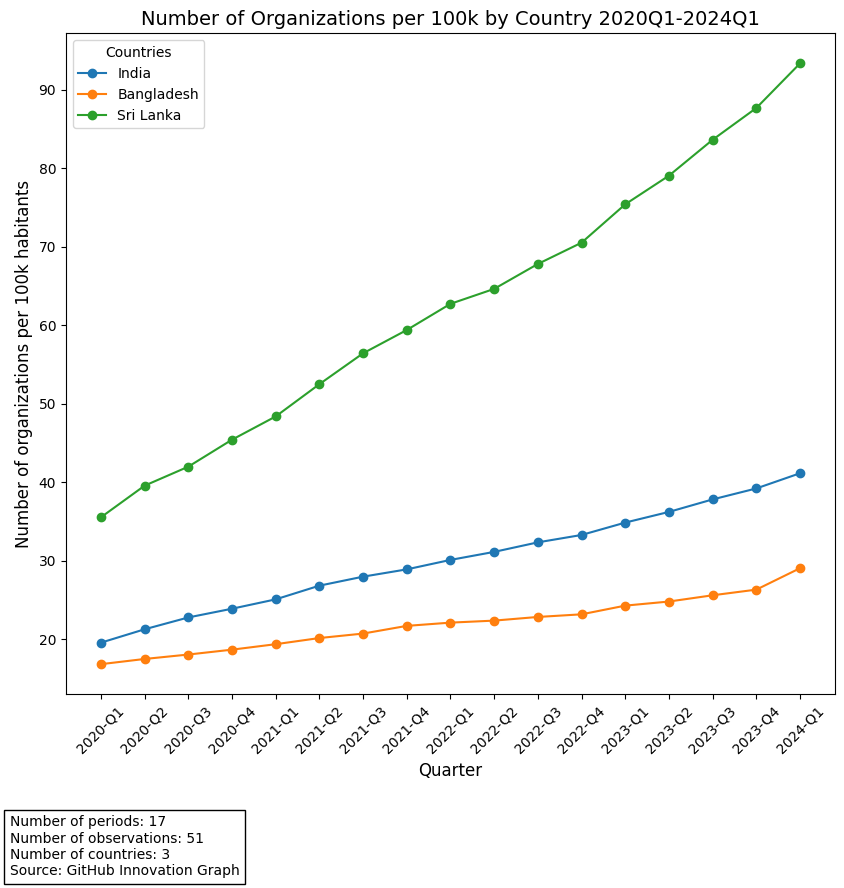

In [38]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 8))

# Obtener los países únicos usando la columna 'iso2_code'
countries = org_update['country'].unique()

# Trazar cada país por separado
for country in countries:
    filtered_data_3 = org_update[org_update['country'] == country]
    plt.plot(filtered_data_3['year_quarter'], filtered_data_3['organizations_pc'], marker='o', label=country)

# Personalización del gráfico
plt.title('Number of Organizations per 100k by Country 2020Q1-2024Q1', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of organizations per 100k habitants', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Countries', loc='upper left')
# Crear el texto adicional para estadísticas
text_data = [
    'Number of periods: {}'.format(repos_update['year_quarter'].nunique()),
    'Number of observations: {}'.format(len(repos_update)),
    'Number of countries: {}'.format(repos_update['iso2_code'].nunique()),
    'Source: GitHub Innovation Graph'
]

# Mostrar el texto en el gráfico (fuera del área principal)
plt.gcf().text(0.01, -0.1, '\n'.join(text_data), ha='left', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black'))
# Ajustar el diseño para evitar superposición de elementos
plt.tight_layout(rect=[0, 0, 0.85, 1])



# Mostrar el gráfico
plt.show()

#### Analysis
This graph shows the number of organizations per 100,000 inhabitants by country (India, Bangladesh, and Sri Lanka) from Q1 2020 to Q1 2024. The key insights from the data include:

- **Sri Lanka** shows the highest number of organizations per 100k inhabitants, with a steep growth from 30 in Q1 2020 to over 90 by Q1 2024. This indicates a highly active organizational base relative to its population size, likely reflecting a thriving startup ecosystem.
- **India** shows steady growth, increasing from around 20 organizations per 100k in Q1 2020 to over 50 by Q1 2024. This growth reflects India's large and expanding tech industry, with more organizations being established over time.
- **Bangladesh** remains behind both Sri Lanka and India, but still shows growth, increasing from around 20 organizations per 100k to approximately 30 by Q1 2024. This suggests a more gradual growth of organizations in the tech sector compared to its regional counterparts.

#### Key Observations:
- **Sri Lanka**’s rapid growth in organizations per capita suggests a strong support system for new tech businesses and an entrepreneurial culture that encourages the creation of new organizations.
- **India**’s steady growth is consistent with its position as a global tech hub, with more organizations being formed as its tech ecosystem expands, even if the per capita numbers remain lower than Sri Lanka.
- **Bangladesh** shows slower but steady growth, reflecting the development of its tech sector. While it lags behind, the increase in the number of organizations is promising for the future of tech innovation in the country.

#### Comparative Insights:
- **Sri Lanka** continues to lead in terms of organizations per capita, suggesting a strong focus on fostering new businesses in the tech sector.
- **India**’s numbers, though lower per capita than Sri Lanka, reflect its vast organizational landscape and continuous growth in tech-related industries.
- **Bangladesh**'s slower pace of growth compared to the other two countries may be due to infrastructural or economic challenges, but the upward trend indicates ongoing development in its tech sector.

## Licenses

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This code loads a dataset of software licenses, filters it for Bangladesh, and creates a bar plot to visualize the number of "pushers" (contributors) for each license type in the country.

In [40]:
licenses = pd.read_csv('https://raw.githubusercontent.com/github/innovationgraph/refs/heads/main/data/licenses.csv')
licenses

,num_pushers,spdx_license,iso2_code,year,quarter
0,738,MIT,AE,2020,1
1,217,NOASSERTION,AE,2020,1
2,201,Apache-2.0,AE,2020,1
3,152,GPL-3.0,AE,2020,1
4,182,MIT,AL,2020,1
...,...,...,...,...,...
13860,124,GPL-2.0,ZA,2024,1
13861,123,CC0-1.0,ZA,2024,1
13862,119,Unlicense,ZA,2024,1
13863,175,MIT,ZM,2024,1


In [41]:
Bangladesh = licenses[(licenses.iso2_code == 'BD')]
Bangladesh

,num_pushers,spdx_license,iso2_code,year,quarter
38,1675,MIT,BD,2020,1
39,478,GPL-3.0,BD,2020,1
40,433,Apache-2.0,BD,2020,1
41,428,NOASSERTION,BD,2020,1
42,114,GPL-2.0,BD,2020,1
...,...,...,...,...,...
13001,249,GPL-2.0,BD,2024,1
13002,244,AGPL-3.0,BD,2024,1
13003,141,Unlicense,BD,2024,1
13004,121,BSD-3-Clause,BD,2024,1


The chart shows a clear distribution of contributors across various software licenses in Bangladesh. Some licenses, such as MIT and GPL-3.0, have a significantly higher number of contributors, while others, like Proprietary and Apache-2.0, have fewer contributors. This suggests that certain open-source licenses, such as MIT, attract more developer participation compared to others. The bars are ordered to highlight this variation, providing insight into the preferred licenses within the country.

C:\Users\ronco\AppData\Local\Temp\ipykernel_9848\1832686797.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='spdx_license', y='num_pushers', data=Bangladesh, ci=None)  # Agrega ci=None


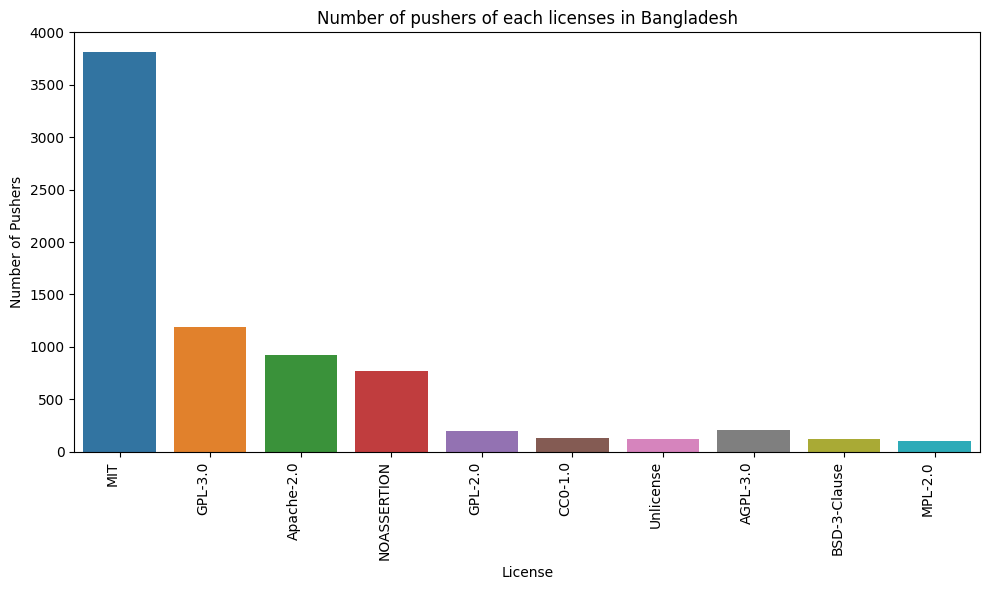

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='spdx_license', y='num_pushers', data=Bangladesh, ci=None)  # Agrega ci=None
plt.xticks(rotation=90, ha='right')
plt.title('Number of pushers of each licenses in Bangladesh')
plt.xlabel('License')
plt.ylabel('Number of Pushers')
plt.tight_layout()
plt.show()

We collapse specific software licenses into a new category called "Other Licenses" for each year and quarter in Bangladesh's dataset. It first defines a list of licenses to collapse. Then, for each unique combination of year and quarter, it sums the number of contributors for the selected licenses (licenses_to_collapse) and adds the total to the "Other Licenses" category. If "Other Licenses" already exists for that year and quarter, the number of contributors is updated. If not, a new row is added for "Other Licenses." Finally, the original dataset is updated by removing the collapsed licenses.

In [43]:
licenses_to_collapse = ['GPL-2.0', 'CC0-1.0', 'Unlicense', 'AGPL-3.0', 'BSD-3-Clause', 'MPL-2.0']


for year, quarter in Bangladesh[['year', 'quarter']].drop_duplicates().values:

    collapsed_pushers = Bangladesh[
        (Bangladesh['spdx_license'].isin(licenses_to_collapse)) &
        (Bangladesh['year'] == year) &
        (Bangladesh['quarter'] == quarter)
    ]['num_pushers'].sum()

   
    if not Bangladesh[
        (Bangladesh['spdx_license'] == 'Other Licenses') &
        (Bangladesh['year'] == year) &
        (Bangladesh['quarter'] == quarter)
    ].empty:
        Bangladesh.loc[
            (Bangladesh['spdx_license'] == 'Other Licenses') &
            (Bangladesh['year'] == year) &
            (Bangladesh['quarter'] == quarter),
            'num_pushers'
        ] += collapsed_pushers
    else:
        Bangladesh = pd.concat([
            Bangladesh,
            pd.DataFrame({
                'num_pushers': [collapsed_pushers],
                'spdx_license': ['Other Licenses'],
                'iso2_code': [None],
                'year': [year],
                'quarter': [quarter]
            })
        ], ignore_index=True)


Bangladesh = Bangladesh[~Bangladesh['spdx_license'].isin(licenses_to_collapse)]

Here we've selected five groups depending to the licenses.


*   MIT License
*   Apache license
*   GPL 3.0
*   NOASSERTION
*   Others licenses

The chart shows the number of contributors for each software license in Bangladesh, with several licenses collapsed into the "Other Licenses" category. The "Other Licenses" category now represents a significant portion of the contributions, while licenses like MIT and GPL-3.0 still have the most contributors.

C:\Users\ronco\AppData\Local\Temp\ipykernel_9848\826828057.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='spdx_license', y='num_pushers', data=Bangladesh, ci=None)  # Agrega ci=None


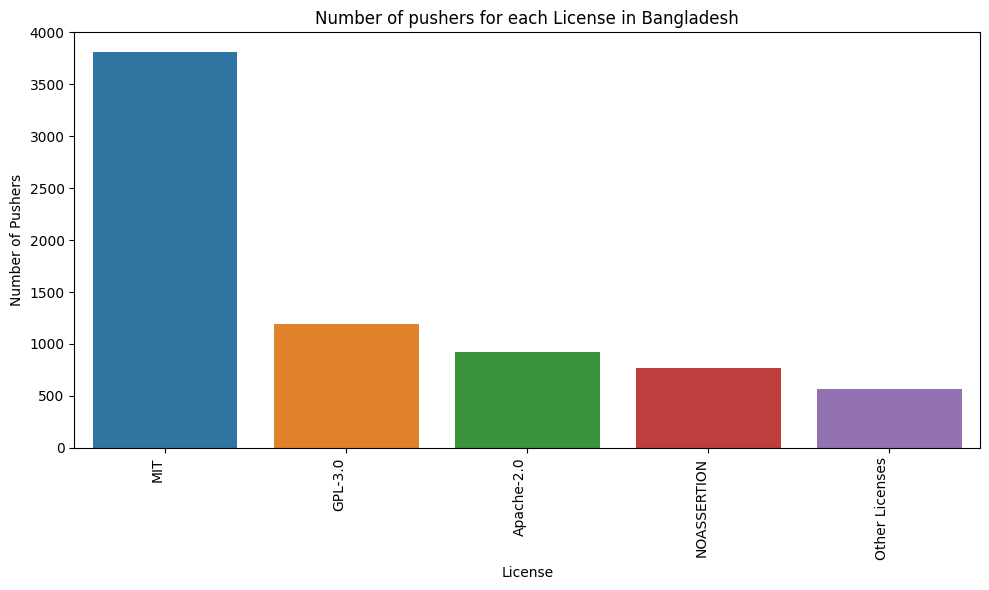

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='spdx_license', y='num_pushers', data=Bangladesh, ci=None)  # Agrega ci=None
plt.xticks(rotation=90, ha='right')
plt.title('Number of pushers for each License in Bangladesh')
plt.xlabel('License')
plt.ylabel('Number of Pushers')
plt.tight_layout()
plt.show()

The plot shows the number of contributors for specific software licenses over time in Bangladesh. It focuses on five categories: MIT, GPL-3.0, Apache-2.0, NOASSERTION, and Other Licenses. The x-axis represents time (quarters), and the y-axis shows the number of contributors. Each line corresponds to a different license, with variations in the number of contributors across different periods, highlighting trends and fluctuations for each license type over time.

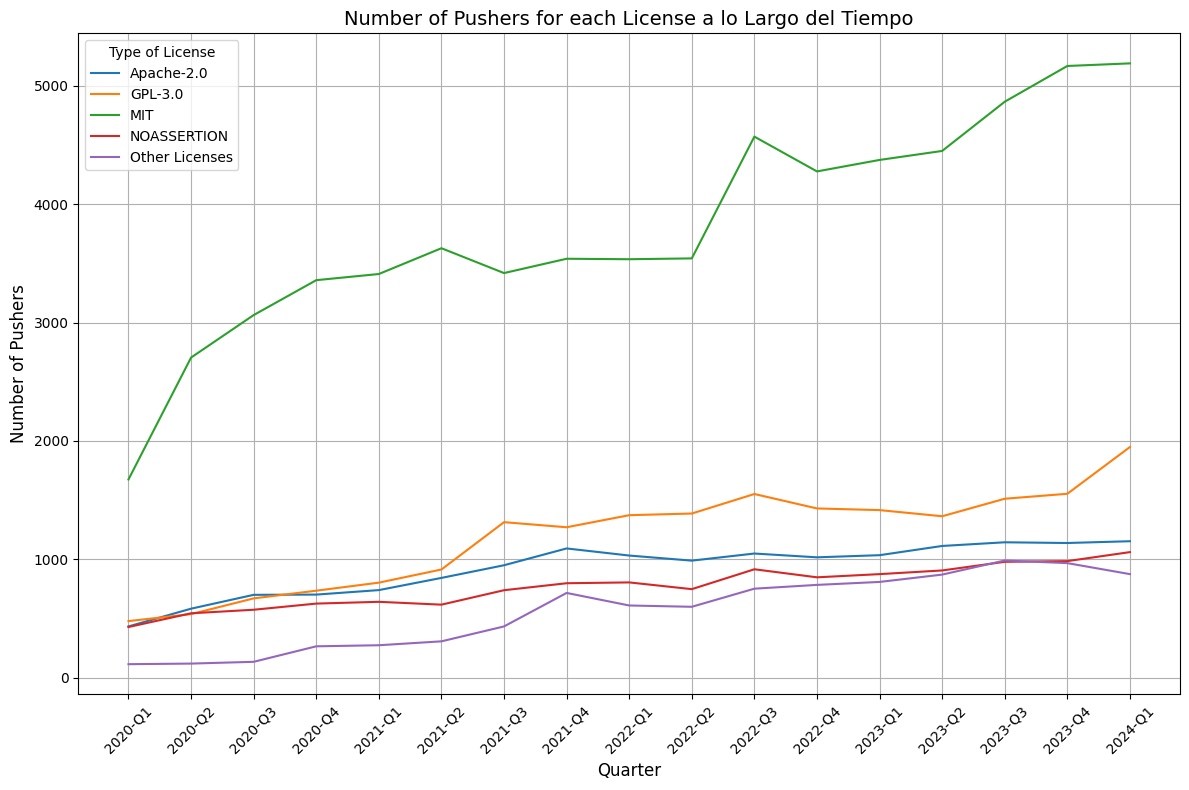

In [45]:
import matplotlib.pyplot as plt


categories = ['MIT', 'GPL-3.0', 'Apache-2.0', 'NOASSERTION', 'Other Licenses']
filtered_data = Bangladesh[Bangladesh['spdx_license'].isin(categories)]

grouped_data = filtered_data.groupby(['year', 'quarter', 'spdx_license'])['num_pushers'].sum().reset_index()

grouped_data['time'] = grouped_data['year'].astype(str) +  "-Q" + grouped_data['quarter'].astype(str)

pivot_data = grouped_data.pivot(index='time', columns='spdx_license', values='num_pushers').fillna(0)

plt.figure(figsize=(12, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)

plt.title("Number of Pushers for each License a lo Largo del Tiempo", fontsize=14)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Number of Pushers", fontsize=12)
plt.legend(title="Type of License", loc='upper left')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Topics

The code loads a dataset containing topics related to software development, filters the data for Bangladesh (iso2_code = 'BD'), and displays the relevant information for that country. The resulting dataset bgd contains all topics associated with Bangladesh.

In [46]:
topics = pd.read_csv('https://raw.githubusercontent.com/github/innovationgraph/refs/heads/main/data/topics.csv')
topics

,num_pushers,topic,iso2_code,year,quarter
0,7206,python,EU,2020,1
1,6739,python,US,2020,1
2,5231,javascript,EU,2020,1
3,5025,javascript,US,2020,1
4,3874,java,EU,2020,1
...,...,...,...,...,...
51329,101,datascience,US,2024,1
51330,101,zshrc,US,2024,1
51331,101,web-application,US,2024,1
51332,101,reproducibility,US,2024,1


In [47]:
bgd = topics[(topics.iso2_code == 'BD')]
bgd

,num_pushers,topic,iso2_code,year,quarter
1110,145,javascript,BD,2020,1
1282,129,python,BD,2020,1
1760,102,php,BD,2020,1
2636,211,javascript,BD,2020,2
3017,157,python,BD,2020,2
...,...,...,...,...,...
50822,113,django,BD,2024,1
51152,104,mysql,BD,2024,1
51199,103,machine-learning,BD,2024,1
51280,101,redux-toolkit,BD,2024,1


The bar plot shows the distribution of contributors across different software development topics in Bangladesh. The x-axis represents various topics, while the y-axis indicates the number of contributors for each topic. The chart highlights which topics have the highest and lowest number of contributors, providing insights into the areas of focus for developers in Bangladesh.

C:\Users\ronco\AppData\Local\Temp\ipykernel_9848\639993514.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='num_pushers', data=bgd, ci=None)


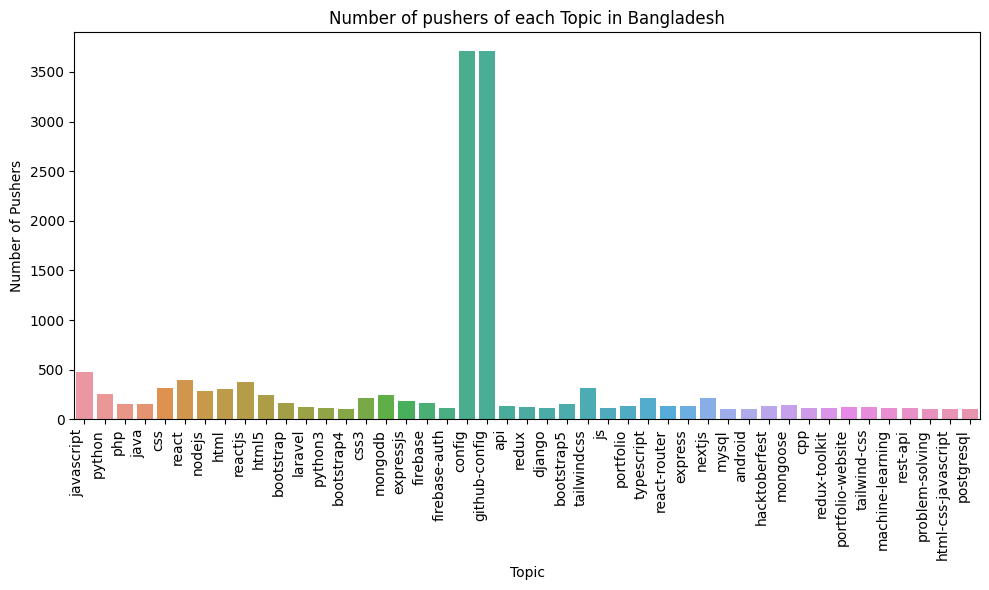

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='num_pushers', data=bgd, ci=None)  
plt.xticks(rotation=90, ha='right')
plt.title('Number of pushers of each Topic in Bangladesh')
plt.xlabel('Topic')
plt.ylabel('Number of Pushers')
plt.tight_layout()
plt.show()

The process aggregates contributors for the "Python 3" topic into the "python" topic by summing the contributors for each year and quarter. The total number of contributors for "Python 3" is added to "python", and then the "Python 3" entries are removed from the dataset. Finally, the total number of contributors for "python" is calculated and printed after the aggregation, ensuring that both "Python" and "Python 3" are combined into one category.

In [49]:
for year, quarter in bgd[['year', 'quarter']].drop_duplicates().values:
    python3_pushers = bgd[
        (bgd['topic'] == 'Python 3') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter)
    ]['num_pushers'].sum()

    bgd.loc[
        (bgd['topic'] == 'python') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter),
        'num_pushers'
    ] += python3_pushers

bgd = bgd[bgd['topic'] != 'Python 3']

python_total_pushers = bgd[bgd['topic'] == 'python']['num_pushers'].sum()
print(f"Total de pushers para 'python' después de colapsar: {python_total_pushers}")

Total de pushers para 'python' después de colapsar: 4318


The process aggregates contributors for the "react-router" and "reactjs" topics into the "react" topic for each year and quarter. The number of contributors for both "react-router" and "reactjs" is summed and added to the corresponding "react" topic. After this, the entries for "react-router" and "reactjs" are removed from the dataset. Finally, the total number of contributors for the "react" topic is calculated and printed after the aggregation, merging all related topics under "react."

In [50]:
for year, quarter in bgd[['year', 'quarter']].drop_duplicates().values:
    react_router_pushers = bgd[
        (bgd['topic'] == 'react-router') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter)
    ]['num_pushers'].sum()

    reactjs_pushers = bgd[
        (bgd['topic'] == 'reactjs') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter)
    ]['num_pushers'].sum()


    bgd.loc[
        (bgd['topic'] == 'react') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter),
        'num_pushers'
    ] += react_router_pushers + reactjs_pushers

bgd = bgd[~bgd['topic'].isin(['react-router', 'reactjs'])]

react_total_pushers = bgd[bgd['topic'] == 'react']['num_pushers'].sum()
print(f"Total de pushers para 'react' después de colapsar: {react_total_pushers}")

Total de pushers para 'react' después de colapsar: 12867


The process aggregates contributors for the "tailwind-css" topic into the "tailwindcss" topic for each year and quarter. The number of contributors for "tailwind-css" is summed and added to the corresponding "tailwindcss" topic. Afterward, the "tailwind-css" entries are removed from the dataset. Finally, the total number of contributors for the "tailwindcss" topic is calculated and printed after the aggregation, consolidating both "tailwind-css" and "tailwindcss" under one category.

In [51]:
for year, quarter in bgd[['year', 'quarter']].drop_duplicates().values:
    tailwind_css_pushers = bgd[
        (bgd['topic'] == 'tailwind-css') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter)
    ]['num_pushers'].sum()

    bgd.loc[
        (bgd['topic'] == 'tailwindcss') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter),
        'num_pushers'
    ] += tailwind_css_pushers

bgd = bgd[bgd['topic'] != 'tailwind-css']

tailwindcss_total_pushers = bgd[bgd['topic'] == 'tailwindcss']['num_pushers'].sum()
print(f"Total de pushers para 'tailwindcss' después de colapsar: {tailwindcss_total_pushers}")

Total de pushers para 'tailwindcss' después de colapsar: 3694


The process aggregates contributors for the "firebase-auth" topic into the "firebase" topic for each year and quarter. The total number of contributors for "firebase-auth" is summed and added to the corresponding "firebase" topic. After this, the entries for "firebase-auth" are removed from the dataset. Finally, the total number of contributors for the "firebase" topic is calculated and printed after the aggregation, combining the contributions for both "firebase" and "firebase-auth" under the "firebase" category.

In [52]:
for year, quarter in bgd[['year', 'quarter']].drop_duplicates().values:
    firebase_auth_pushers = bgd[
        (bgd['topic'] == 'firebase-auth') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter)
    ]['num_pushers'].sum()

    bgd.loc[
        (bgd['topic'] == 'firebase') &
        (bgd['year'] == year) &
        (bgd['quarter'] == quarter),
        'num_pushers'
    ] += firebase_auth_pushers

bgd = bgd[bgd['topic'] != 'firebase-auth']

firebase_total_pushers = bgd[bgd['topic'] == 'firebase']['num_pushers'].sum()
print(f"Total de pushers para 'firebase' después de colapsar: {firebase_total_pushers}")

Total de pushers para 'firebase' después de colapsar: 2619


The bar plot displays the number of contributors ("pushers") for each selected topic in Bangladesh. The x-axis represents various topics, including python, react, tailwindcss, github-config, config, firebase, and machine-learning, while the y-axis shows the number of contributors for each topic. The chart highlights which topics have the most active contributors, with python and react showing higher participation compared to others, indicating their popularity in Bangladesh's developer community.

C:\Users\ronco\AppData\Local\Temp\ipykernel_9848\2290340867.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='num_pushers', data=filtered_data_bar, ci=None)


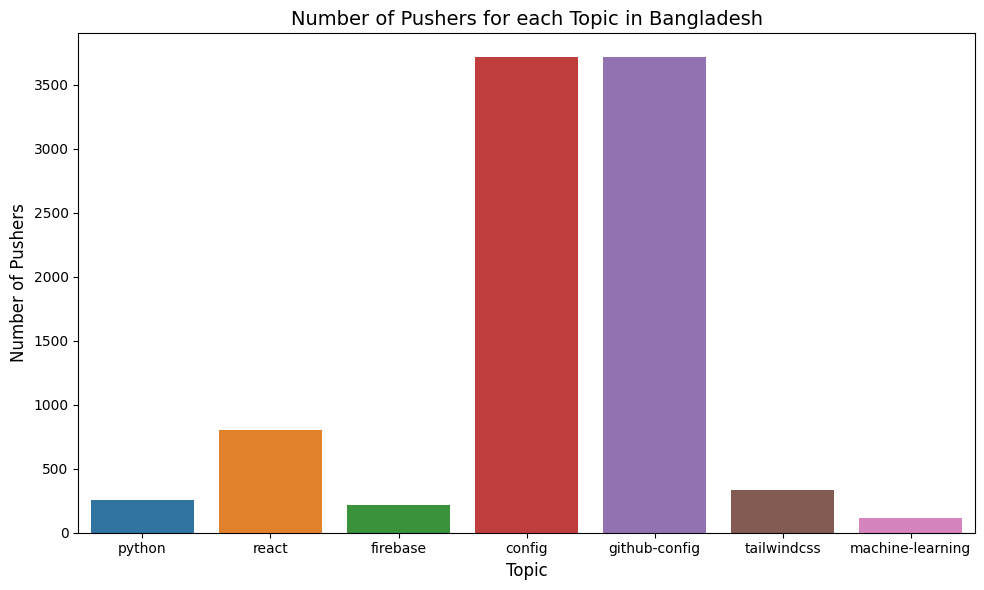

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para las categorías seleccionadas
categories = ['python', 'react', 'tailwindcss', 'github-config', 'config', 'firebase', 'machine-learning']
filtered_data_bar = bgd[bgd['topic'].isin(categories)]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='num_pushers', data=filtered_data_bar, ci=None)
plt.xticks(rotation=0, ha='center')
plt.title('Number of Pushers for each Topic in Bangladesh', fontsize=14)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Number of Pushers', fontsize=12)
plt.tight_layout()
plt.show()
